# Homework 4 - Ahmet Kurt - 290201034

1. Imported necessary libraries.

In [1]:
#Importing necessary libraries.
import matplotlib.pylab as plt
import numpy as np
from skimage import io
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
import cv2

2. Loaded the image link and showed the original (gray scale) image.

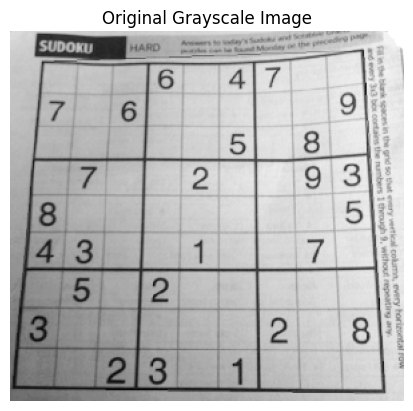

In [2]:
#Link given in the homework description.
imim = imread("https://raw.githubusercontent.com/cvrg-iyte/cvrg-iyte.github.io/master/assets/img/image3.png")

#Converting to grayscale.
gray_image = rgb2gray(imim)
gray_image*= 255
gray_image = gray_image.astype(np.uint8)

plt.imshow(gray_image, cmap="gray")
plt.title("Original Grayscale Image")
plt.axis("off")
plt.show()

3. Showed the histogram of the image for in range [0-255]

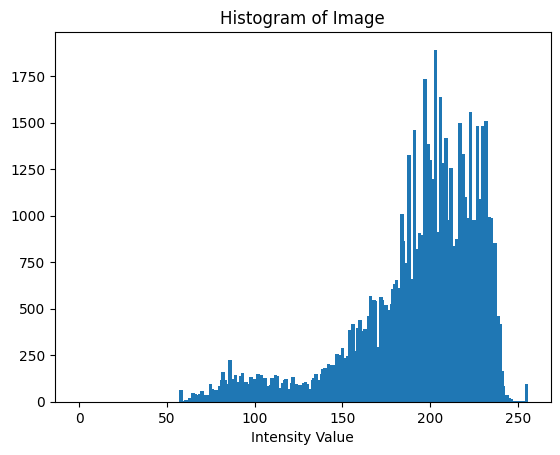

In [3]:
histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
intensity_values = np.array([x for x in range(histogram.shape[0])])
plt.bar(intensity_values, histogram[:, 0], width = 2)
plt.title("Histogram of Image")
plt.xlabel("Intensity Value")
plt.show()

4.Mean value of the intensity histogram. (This is the initial value of the T.)

In [4]:
mean = np.mean(gray_image)
print(f"Mean of the image: {mean}")

Mean of the image: 193.1719390564768



5. Implemented the Basic Global Thresholding Algorithm

In [5]:
def basic_global_thresholding(gray_image, epsilon=0.01):

    T = mean # Initial threshold.
    delta_T = np.inf
    iteration = 1

    print("Basic Global Threshold Calculation:")
    print("-----------------------------------\n")
    while delta_T > epsilon:
        G1 = gray_image[gray_image < T]  # Eliminate.
        G2 = gray_image[gray_image >= T]  # Rest ones.

        mean1 = np.mean(G1) if len(G1) > 0 else 0
        mean2 = np.mean(G2) if len(G2) > 0 else 0

        T_new = (mean1 + mean2) / 2

        delta_T = abs(T_new - T) # |newThreshold - oldThreshold|

        print(f"Iteration {iteration}: T = {T:.7f} and ΔT = {delta_T:.7f}")

        # Updating.
        T = T_new
        iteration += 1

    print(f"\n Basic Global Threshold Value: {T:.7f}")
    print("-----------------------------------\n")
    return T

epsilon = 0.01
bgt_threshold = basic_global_thresholding(gray_image, epsilon)

Basic Global Threshold Calculation:
-----------------------------------

Iteration 1: T = 193.1719391 and ΔT = 6.1984332
Iteration 2: T = 186.9735059 and ΔT = 5.4461772
Iteration 3: T = 181.5273286 and ΔT = 3.5399993
Iteration 4: T = 177.9873293 and ΔT = 2.7584165
Iteration 5: T = 175.2289128 and ΔT = 1.0694072
Iteration 6: T = 174.1595056 and ΔT = 0.6547125
Iteration 7: T = 173.5047931 and ΔT = 0.2370562
Iteration 8: T = 173.2677369 and ΔT = 0.0000000

 Basic Global Threshold Value: 173.2677369
-----------------------------------



6. Compared with the Otsu's threshold and printed the images.

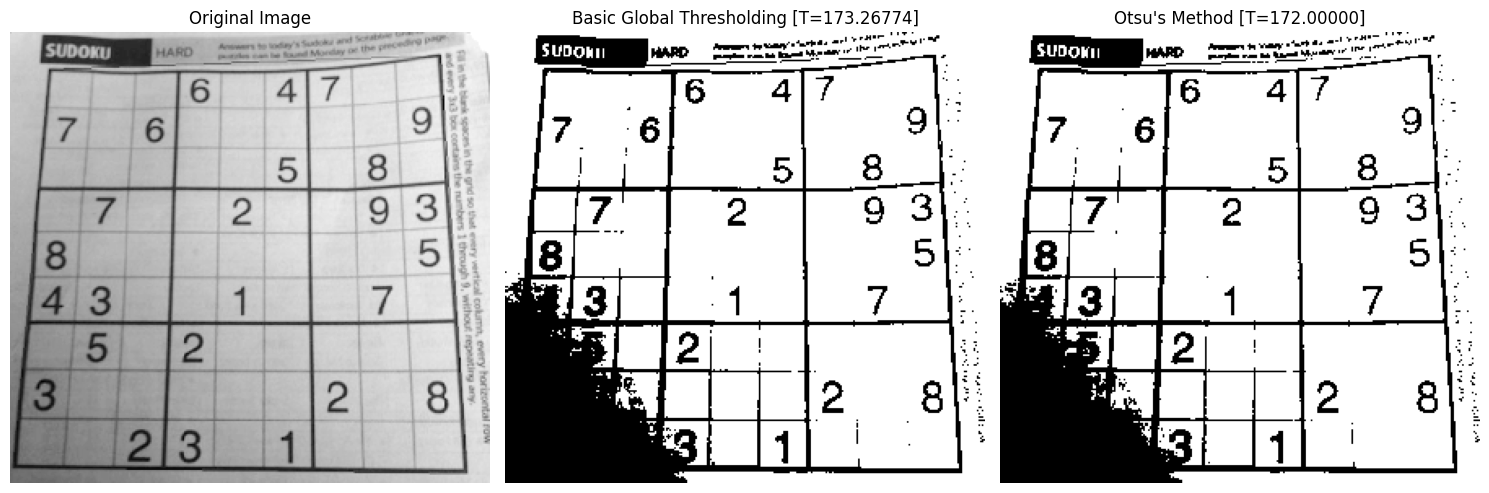

In [6]:
otsu_threshold = threshold_otsu(gray_image)

bgt_image = gray_image > bgt_threshold
otsu_image = gray_image > otsu_threshold

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(gray_image, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(bgt_image, cmap="gray")
axes[1].set_title(f"Basic Global Thresholding [T={bgt_threshold:.5f}]")
axes[1].axis("off")

axes[2].imshow(otsu_image, cmap="gray")
axes[2].set_title(f"Otsu's Method [T={otsu_threshold:.5f}]")
axes[2].axis("off")

plt.tight_layout()
plt.show()

7. Values and my comments.




*   The difference between my implementation (basic global thresholding) and Otsu's threshold is minimal; however, Otsu's method can be considered slightly better. For example, the number "4" located below "8" and to the left of "3" is more clearly visible in Otsu's result.



---


* Basic Global Thresholding Result: T ≈ 173.2677 (my implementation).

* Otsu’s Threshold Result: T ≈ automatically calculated (T ≈ 172).


---

*   Otsu's method often delivers a more accurate threshold by maximizing the separation between different pixel classes.

*   Basic Global Thresholding, on the other hand, is a simpler approach that relies directly on the overall distribution of the image histogram.





In [7]:
# End of the notebook.